### Import libraires

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import joblib


### Choix du modèle

In [4]:
data = pd.read_csv("data/donnees_preparees_retards.csv")

In [5]:
print(data.dtypes)

Ville de depart                          int64
Ville d'arrivee                          int64
Distance (km)                            int64
Heure depart prevue                     object
Heure arrivee prevue                    object
Heure arrivee reelle                    object
Poids (kg)                               int64
Retard observe (minutes)                 int64
Distance_group                          object
Duree reelle (minutes)                   int64
Jour de la semaine                      object
Jour ferie                                bool
Heure_depart                             int64
Heure_arrivee                            int64
Weekend                                  int64
Duree prevue (minutes)                   int64
Difference duree (minutes)               int64
Retard par rapport a la duree prevue     int64
Categorie_distance                       int64
Heure_de_trafic                          int64
Retard_prevu                             int64
dtype: object

In [9]:
# Sélectionner les caractéristiques (features) et la cible (target)
features = [
    "Ville de depart", "Ville d'arrivee", "Distance (km)", "Poids (kg)",
    "Heure_depart", "Heure_arrivee", "Weekend", "Jour ferie",
    "Duree reelle (minutes)"
]

X = data[features]
y = data["Retard observe (minutes)"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialiser les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Entraîner les modèles et évaluer leurs performances
results = {}
for model_name, model in models.items():
    # Entraîner le modèle
    model.fit(X_train, y_train)
    
    # Prédire sur l'ensemble de test
    y_pred = model.predict(X_test)
    
    # Calculer les métriques de performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Stocker les résultats
    results[model_name] = {"MSE": mse, "R2 Score": r2}
    
    print(f"Model: {model_name}")
    print(f"MSE: {mse:.2f}, R2 Score: {r2:.2f}\n")

Model: Linear Regression
MSE: 1076.86, R2 Score: 0.09

Model: Random Forest
MSE: 46.75, R2 Score: 0.96

Model: Support Vector Machine
MSE: 1183.99, R2 Score: -0.00

Model: Decision Tree
MSE: 21.20, R2 Score: 0.98



In [15]:
results_df = pd.DataFrame(results).T
print(results_df)

                                MSE  R2 Score
Linear Regression       1076.860012  0.090441
Random Forest             46.753907  0.960510
Support Vector Machine  1183.986816 -0.000043
Decision Tree             21.200000  0.982094


In [17]:
# Optimisation des hyperparamètres pour Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=3, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train, y_train)

# Meilleurs paramètres et score pour Decision Tree
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Cross-validation Score for Decision Tree:", grid_search_dt.best_score_)

# Entraîner le modèle Decision Tree avec les meilleurs paramètres
best_dt = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)

# Évaluer le modèle Decision Tree optimisé
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)
print(f"Optimized Decision Tree MSE: {mse_best_dt:.2f}, R2 Score: {r2_best_dt:.2f}")

# Optimisation des hyperparamètres pour Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Meilleurs paramètres et score pour Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-validation Score for Random Forest:", grid_search_rf.best_score_)

# Entraîner le modèle Random Forest avec les meilleurs paramètres
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Évaluer le modèle Random Forest optimisé
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Optimized Random Forest MSE: {mse_best_rf:.2f}, R2 Score: {r2_best_rf:.2f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-validation Score for Decision Tree: 0.9547143040289868
Optimized Decision Tree MSE: 30.34, R2 Score: 0.97
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score for Random Forest: 0.9487008460493188
Optimized Random Forest MSE: 37.89, R2 Score: 0.97


In [18]:
# Effectuer une validation croisée
cv_scores = {}
for model_name, model in models.items():
    cv_mse = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    
    cv_scores[model_name] = {"CV MSE": cv_mse, "CV R2 Score": cv_r2}
    
    print(f"Model: {model_name}")
    print(f"CV MSE: {cv_mse:.2f}, CV R2 Score: {cv_r2:.2f}\n")

# Afficher les résultats sous forme de tableau
cv_results_df = pd.DataFrame(cv_scores).T
print(cv_results_df)

Model: Linear Regression
CV MSE: 1157.13, CV R2 Score: 0.09

Model: Random Forest
CV MSE: 25.44, CV R2 Score: 0.98

Model: Support Vector Machine
CV MSE: 1286.33, CV R2 Score: -0.01

Model: Decision Tree
CV MSE: 40.44, CV R2 Score: 0.97

                             CV MSE  CV R2 Score
Linear Regression       1157.130044     0.089667
Random Forest             25.442591     0.980102
Support Vector Machine  1286.334610    -0.013656
Decision Tree             40.440000     0.968868


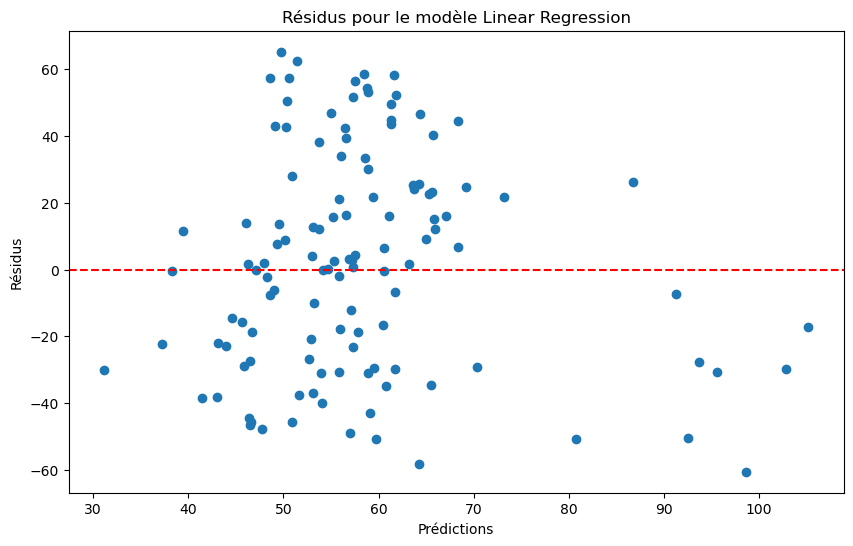

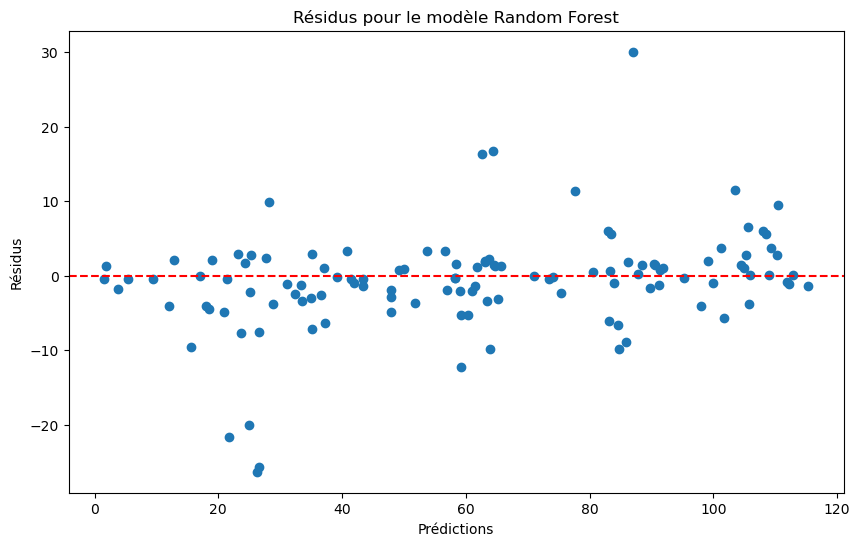

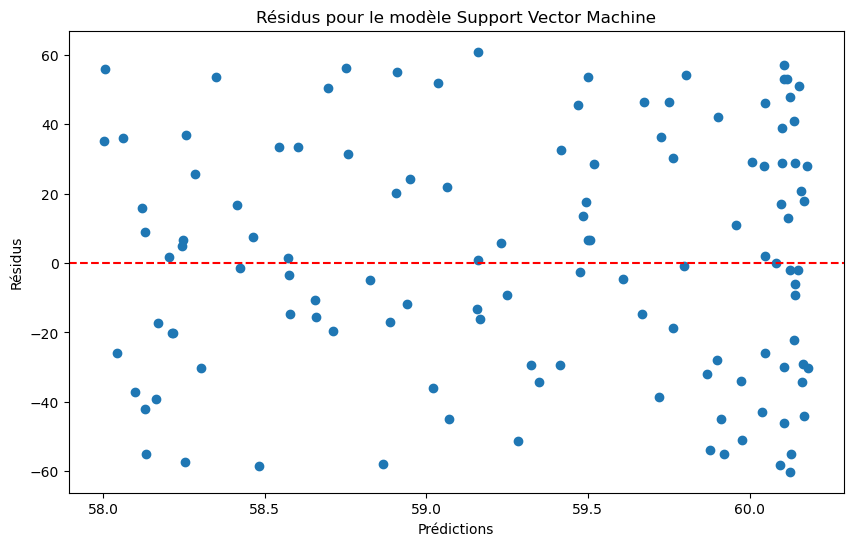

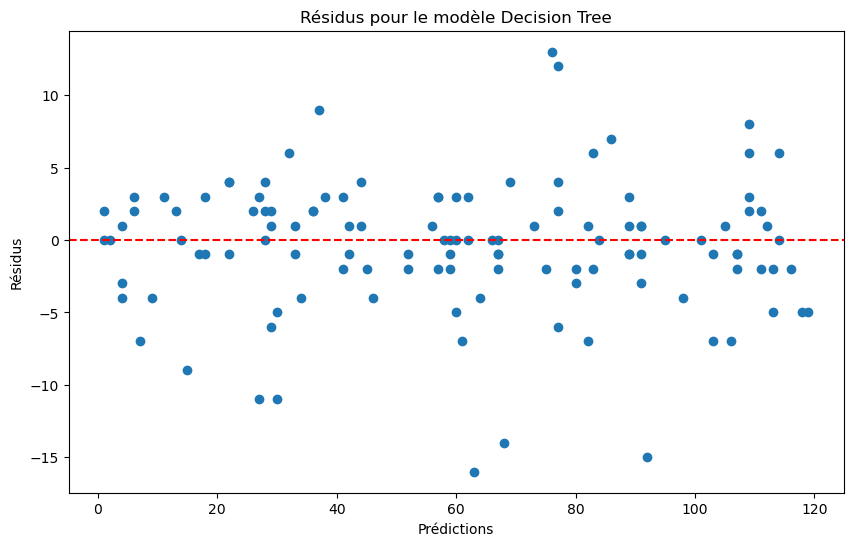

In [19]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Prédictions')
    plt.ylabel('Résidus')
    plt.title(f'Résidus pour le modèle {model_name}')
    plt.show()

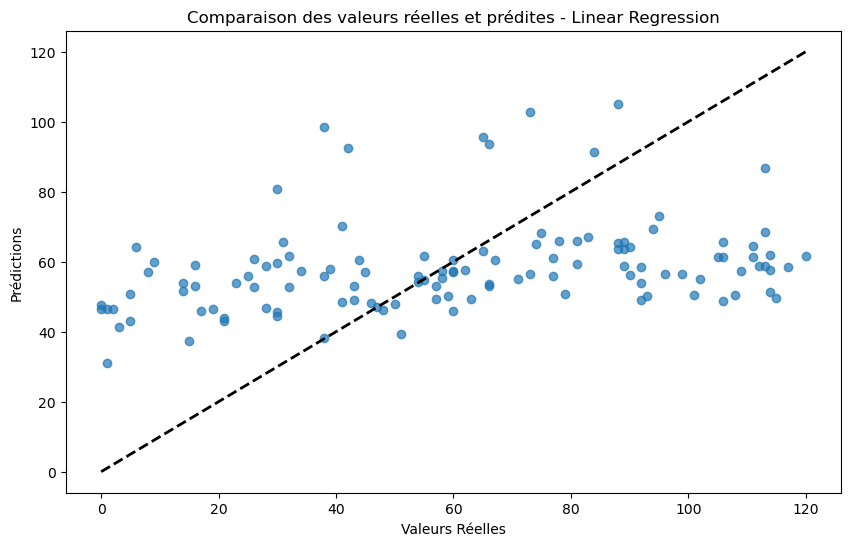

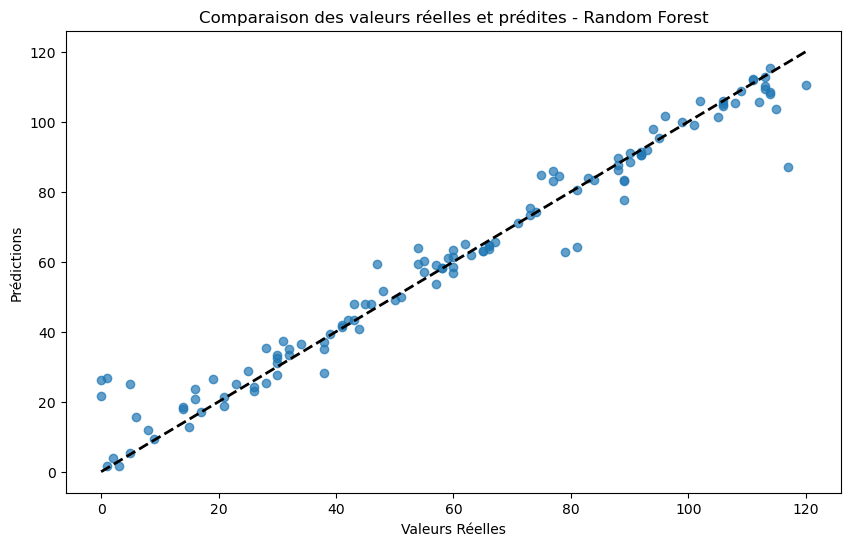

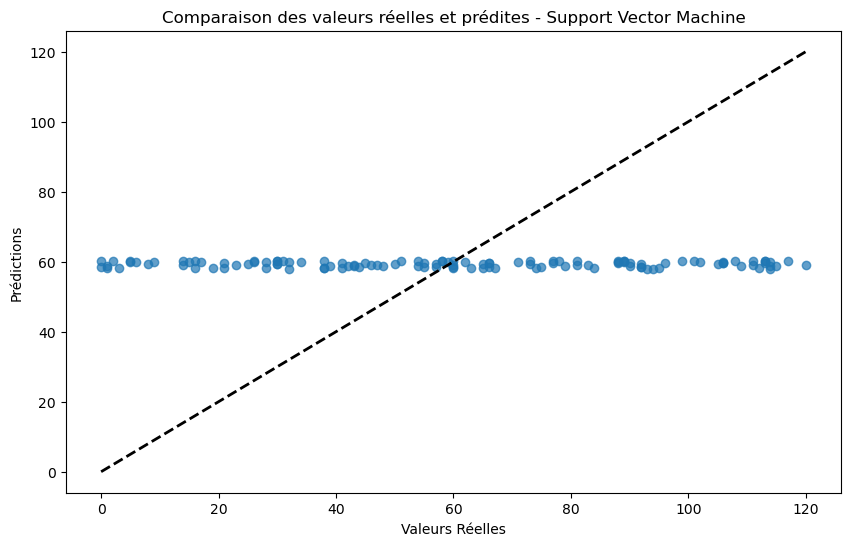

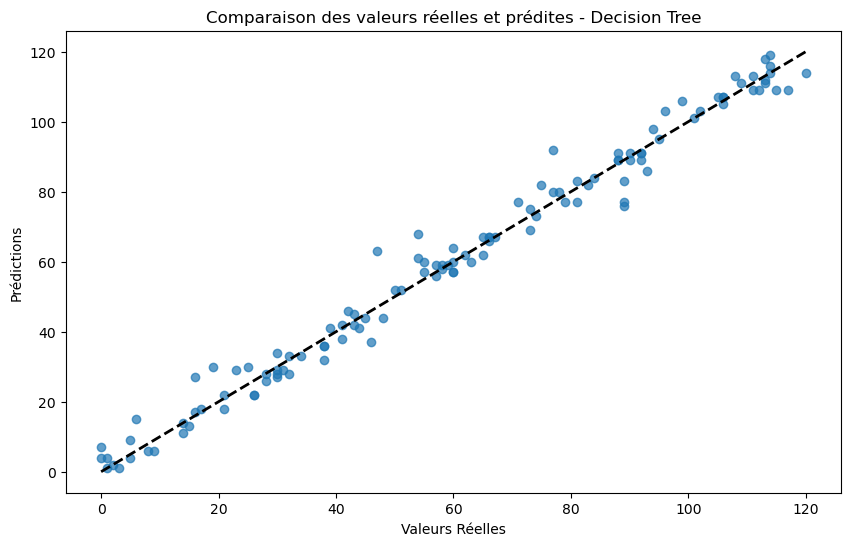

In [20]:
def plot_predictions_vs_actual(y_test, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Prédictions')
    plt.title(f'Comparaison des valeurs réelles et prédites - {model_name}')
    plt.show()

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_predictions_vs_actual(y_test, y_pred, model_name)

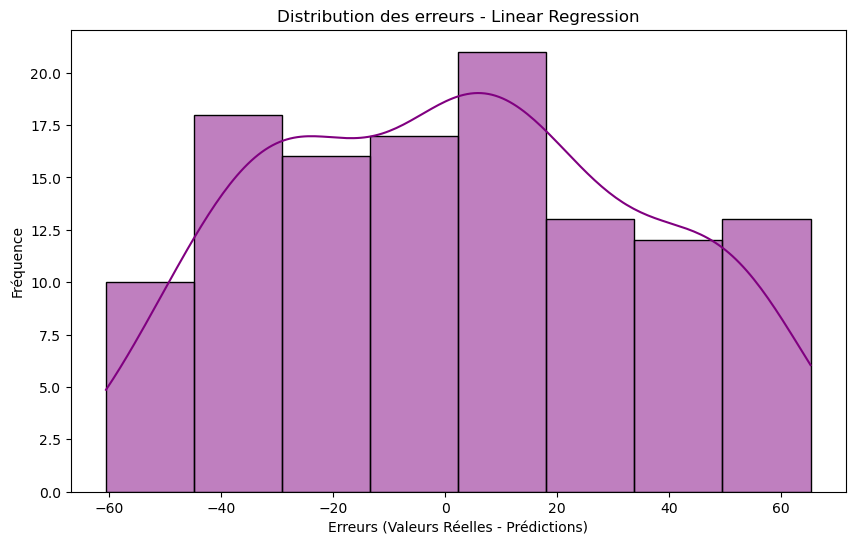

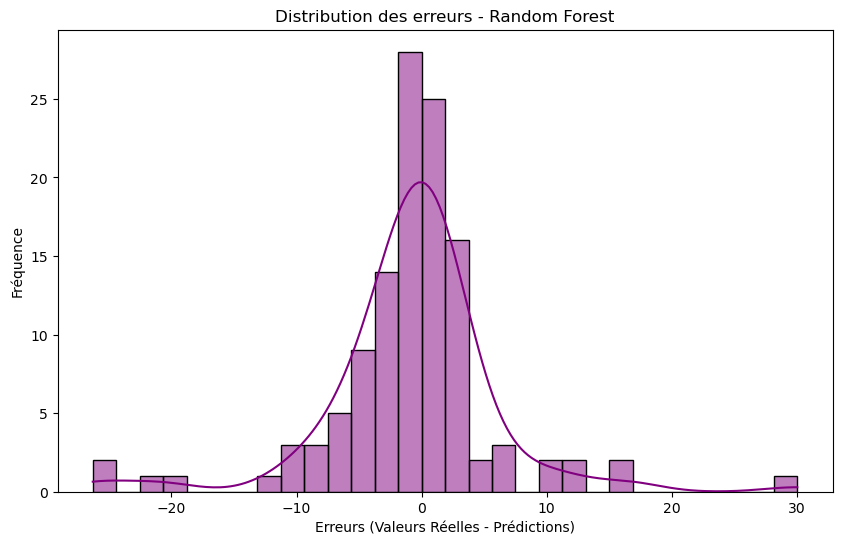

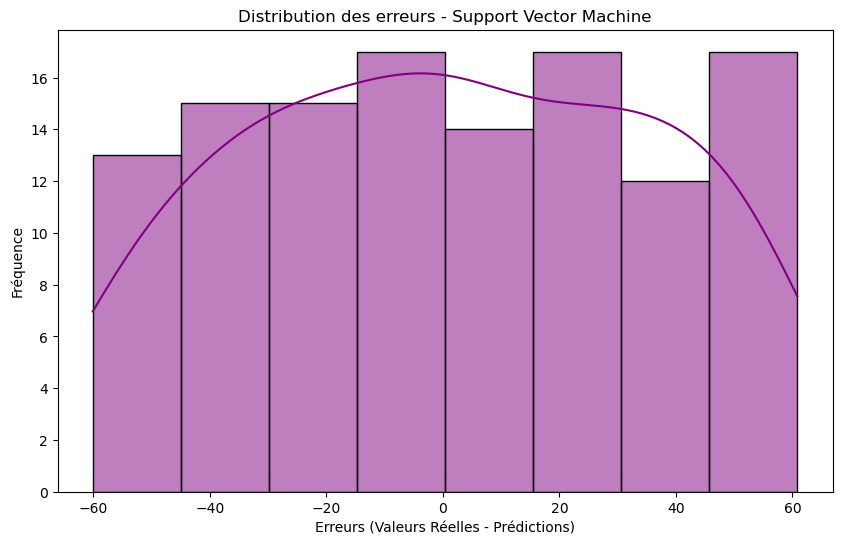

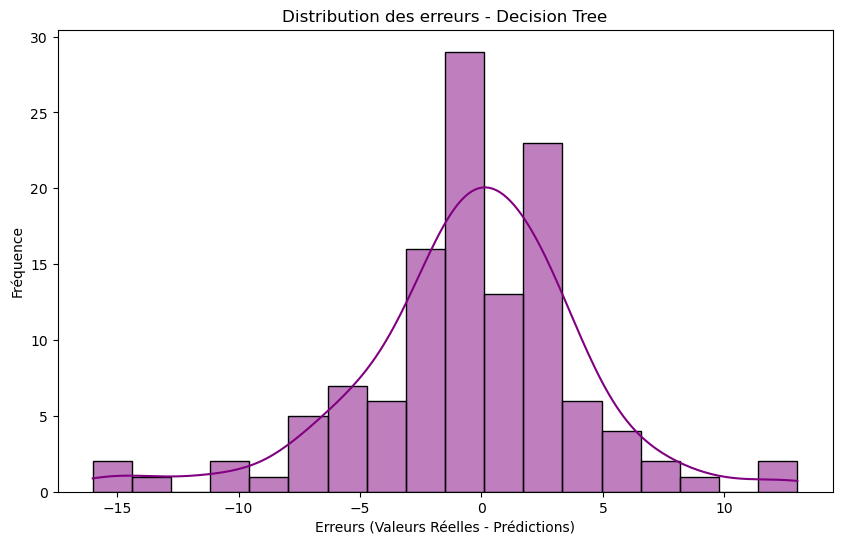

In [21]:
def plot_error_distribution(y_test, y_pred, model_name):
    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True, color='purple')
    plt.xlabel('Erreurs (Valeurs Réelles - Prédictions)')
    plt.ylabel('Fréquence')
    plt.title(f'Distribution des erreurs - {model_name}')
    plt.show()
    
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plot_error_distribution(y_test, y_pred, model_name)

In [23]:
for model_name, model in models.items():
    joblib.dump(model, f"model_pkl/{model_name}_model.pkl")
    print(f"Modèle {model_name} enregistré sous {model_name}_model.pkl")

Modèle Linear Regression enregistré sous Linear Regression_model.pkl
Modèle Random Forest enregistré sous Random Forest_model.pkl
Modèle Support Vector Machine enregistré sous Support Vector Machine_model.pkl
Modèle Decision Tree enregistré sous Decision Tree_model.pkl
